## Import Libraries

In [1]:
import requests  
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

In [2]:
# Get api keys from key file
from api_keys import client_id, client_secret

## Create zip code DF

In [3]:
zipCSVPath = '../../data/Zip_Code_Data.csv'
zipDF = pd.read_csv(zipCSVPath)
zipDF['Zip'] = zipDF['Zip'].astype(str)
zipDF.head()

,Zip,LAT,LNG,Num_Disp,City,Total_Pop,Percent_Under_18_Years,Percent_Ages_18_to_24,Percent_18_and_Older,Percent_21_and_Older,...,Pct_Female,Females_Median_Age,Total_Households,Households_with_Children,Pct_Households_with_Children,Pct_Owner_Occupied,Pct_Renter_Occupied,Household_Median_Income,Household_Median_Inc_Quintiles,Pct_Earned_Income_Past_12_Months
0,90021,34.030124,-118.241779,44.0,Los Angeles,2945,11.3,5.7,88.7,86.8,...,38.4,35.2,1734,171,9.9,9.0,91.0,21635,Quintile 1,25.4
1,90058,34.001842,-118.221127,9.0,Los Angeles,2718,41.1,10.4,58.9,53.1,...,58.1,25.3,706,336,47.6,12.0,88.0,21964,Quintile 1,40.9
2,90013,34.046022,-118.246250,2.0,Los Angeles,12559,3.2,5.5,96.8,96.1,...,36.5,40.6,7308,256,3.5,7.8,92.2,22316,Quintile 1,20.2
3,90007,34.028334,-118.285077,4.0,Los Angeles,42433,14.2,38.3,85.8,69.4,...,48.4,25.1,11919,2213,18.6,12.3,87.7,27406,Quintile 1,41.6
4,90037,34.003494,-118.287097,1.0,Los Angeles,67640,27.8,11.0,72.2,67.8,...,49.8,32.2,17699,6455,36.5,24.1,75.9,35424,Quintile 1,51.4


### Create dataframe for LA zip/census data only

In [4]:
laDF = zipDF[(zipDF.City=="Los Angeles")]

print(laDF.shape)
laDF.head()
#laDF.dtypes

(123, 25)


,Zip,LAT,LNG,Num_Disp,City,Total_Pop,Percent_Under_18_Years,Percent_Ages_18_to_24,Percent_18_and_Older,Percent_21_and_Older,...,Pct_Female,Females_Median_Age,Total_Households,Households_with_Children,Pct_Households_with_Children,Pct_Owner_Occupied,Pct_Renter_Occupied,Household_Median_Income,Household_Median_Inc_Quintiles,Pct_Earned_Income_Past_12_Months
0,90021,34.030124,-118.241779,44.0,Los Angeles,2945,11.3,5.7,88.7,86.8,...,38.4,35.2,1734,171,9.9,9.0,91.0,21635,Quintile 1,25.4
1,90058,34.001842,-118.221127,9.0,Los Angeles,2718,41.1,10.4,58.9,53.1,...,58.1,25.3,706,336,47.6,12.0,88.0,21964,Quintile 1,40.9
2,90013,34.046022,-118.246250,2.0,Los Angeles,12559,3.2,5.5,96.8,96.1,...,36.5,40.6,7308,256,3.5,7.8,92.2,22316,Quintile 1,20.2
3,90007,34.028334,-118.285077,4.0,Los Angeles,42433,14.2,38.3,85.8,69.4,...,48.4,25.1,11919,2213,18.6,12.3,87.7,27406,Quintile 1,41.6
4,90037,34.003494,-118.287097,1.0,Los Angeles,67640,27.8,11.0,72.2,67.8,...,49.8,32.2,17699,6455,36.5,24.1,75.9,35424,Quintile 1,51.4


In [5]:
# borrowed this check from the madrid study.  I like this...
laDF.isnull().sum()

Zip                                 0
LAT                                 0
LNG                                 0
Num_Disp                            0
City                                0
Total_Pop                           0
Percent_Under_18_Years              0
Percent_Ages_18_to_24               0
Percent_18_and_Older                0
Percent_21_and_Older                0
Percent_60_and_Older                0
Number_Males                        0
Percent_Male                        0
Male_Median_Age                     0
Number_Females                      0
Pct_Female                          0
Females_Median_Age                  0
Total_Households                    0
Households_with_Children            0
Pct_Households_with_Children        0
Pct_Owner_Occupied                  0
Pct_Renter_Occupied                 0
Household_Median_Income             0
Household_Median_Inc_Quintiles      0
Pct_Earned_Income_Past_12_Months    0
dtype: int64

### Create dataframe for Sacramento zip/census data only

In [6]:
sacDF = zipDF[zipDF.City=="Sacramento"]

sacDF.head()

,Zip,LAT,LNG,Num_Disp,City,Total_Pop,Percent_Under_18_Years,Percent_Ages_18_to_24,Percent_18_and_Older,Percent_21_and_Older,...,Pct_Female,Females_Median_Age,Total_Households,Households_with_Children,Pct_Households_with_Children,Pct_Owner_Occupied,Pct_Renter_Occupied,Household_Median_Income,Household_Median_Inc_Quintiles,Pct_Earned_Income_Past_12_Months
123,95815,38.60,-121.46,NaN,Sacramento,25673,27.0,10.2,73.0,69.2,...,48.5,33,9226,2749,29.8,33.7,66.3,34583,Quintile 1,31.4
124,95824,38.52,-121.44,NaN,Sacramento,30296,28.6,11.1,71.4,67.1,...,50.2,34.2,9103,3627,39.8,39.5,60.5,38985,Quintile 1,40.0
125,95832,38.43,-121.51,NaN,Sacramento,12114,29.6,12.1,70.4,65.5,...,49.3,31,3147,1257,39.9,49.3,50.7,47341,Quintile 1,38.4
126,95823,38.47,-121.44,NaN,Sacramento,79440,29.4,9.2,70.6,67.3,...,51.4,32,23710,9088,38.3,45.7,54.3,47553,Quintile 1,38.9
127,95838,38.64,-121.44,NaN,Sacramento,39053,29.3,10.8,70.7,66.5,...,49.7,32.9,11056,4087,37.0,50.3,49.7,48416,Quintile 2,38.1


In [7]:
# borrowed this check from the madrid study.  I like this...
laDF.isnull().sum()

Zip                                 0
LAT                                 0
LNG                                 0
Num_Disp                            0
City                                0
Total_Pop                           0
Percent_Under_18_Years              0
Percent_Ages_18_to_24               0
Percent_18_and_Older                0
Percent_21_and_Older                0
Percent_60_and_Older                0
Number_Males                        0
Percent_Male                        0
Male_Median_Age                     0
Number_Females                      0
Pct_Female                          0
Females_Median_Age                  0
Total_Households                    0
Households_with_Children            0
Pct_Households_with_Children        0
Pct_Owner_Occupied                  0
Pct_Renter_Occupied                 0
Household_Median_Income             0
Household_Median_Inc_Quintiles      0
Pct_Earned_Income_Past_12_Months    0
dtype: int64

## Define method to get venues by the lat and long

In [8]:
clientID = client_id # Foursquare ID
clientSecret = client_secret # Foursquare Secret
version = '20210830' # Foursquare API version
limit = 100 # A default Foursquare API limit value

In [9]:
# Function to find venues in a given neighbourhood
def getVenues(zipCode, latitudes, longitudes, radius=1000):
    
    cols = ['Zip','Zip Latitude','Zip Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category']
    venuesList=[]
            
    for zipC, lat, lng in zip(zipCode, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            clientID
            ,clientSecret
            ,version
            ,lat
            ,lng
            ,radius
            ,limit)

        # make the GET request
        results = requests.get(url).json()["response"]["venues"]
 #       print(results)
        
        # return only relevant information for each nearby venue
        venuesList.append([(
            zipC,
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results if v['categories']])

    nearbyVenues = pd.DataFrame([item for venuesList in venuesList for item in venuesList])
    nearbyVenues.columns = cols
    
    return(nearbyVenues)

In [10]:
# #### UNCOMMENT THE FOLLOWING FOR A NEW RUN
# # Search for venues within 1Km of radius from the lat and lng
# radius = 100

# laVenuesDF = getVenues(laDF['Zip'],laDF['LAT'],laDF['LNG'],radius)

# laVenuesDF.head()

In [11]:
# # Write out la venue df to csv
laVenueCSV = '../../data/la_venues.csv'
# laVenuesDF.to_csv(laVenueCSV)  #write out venues

In [12]:
# Load la venues dataframe from saved file
laVenuesDF = pd.read_csv(laVenueCSV)
print(laVenuesDF.shape)

laVenuesDF.head(1000)

(10237, 8)


,Unnamed: 0,Zip,Zip Latitude,Zip Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,90021,34.030124,-118.241779,Joker Party Supply,34.030060,-118.242230,Miscellaneous Shop
1,1,90021,34.030124,-118.241779,Los Angeles Wholesale Produce Market,34.031842,-118.242101,Farmers Market
2,2,90021,34.030124,-118.241779,Davalan Sales,34.030091,-118.241833,Food
3,3,90021,34.030124,-118.241779,american celebrations party supplies,34.029739,-118.241905,Arts & Crafts Store
4,4,90021,34.030124,-118.241779,Avina's Tacos,34.030337,-118.242077,Taco Place
...,...,...,...,...,...,...,...,...
995,995,90003,33.963350,-118.273936,CCC Leadership & Business Training Center (L.B...,33.957903,-118.278627,Non-Profit
996,996,90003,33.963350,-118.273936,$1 Tacos,33.968070,-118.278228,Food Truck
997,997,90003,33.963350,-118.273936,Western Truck Exchange,33.960480,-118.271866,Automotive Shop
998,998,90003,33.963350,-118.273936,El Tacorian,33.964539,-118.278740,Taco Place


In [13]:
# Pivot the Venue Category column for each lat and long
pivotedLaDF = pd.get_dummies(laVenuesDF[['Venue Category']],prefix="",prefix_sep="")

pivotedLaDF.head(1000)

,ATM,Accessories Store,Acupuncturist,Adult Boutique,Adult Education Center,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Terminal,...,Wedding Hall,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# add zip to pivoted dataframe
pivotedLaDF['Zip'] = laVenuesDF['Zip'].astype(str)

# move zip to the first column of the pivoted dataframe
orderedCols = [pivotedLaDF.columns[-1]] + list(pivotedLaDF.columns[:-1])
pivotedLaDF = pivotedLaDF[orderedCols]

In [15]:
print(pivotedLaDF.shape)
pivotedLaDF.head(1000) # sanity check

(10237, 502)


,Zip,ATM,Accessories Store,Acupuncturist,Adult Boutique,Adult Education Center,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,...,Wedding Hall,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,90021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,90021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,90021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,90021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,90003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,90003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,90003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,90003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
laGrouped = pivotedLaDF.groupby('Zip').mean().reset_index()

print(laGrouped.shape)
laGrouped.head(1000)

(123, 502)


,Zip,ATM,Accessories Store,Acupuncturist,Adult Boutique,Adult Education Center,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,...,Wedding Hall,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,90001,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.011494,0.0,0.034483,0.0,0.0,0.0,0.000000,0.000000,0.0
1,90002,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.010870,0.0,0.0,0.0,0.010870,0.000000,0.0
2,90003,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.021053,0.0,0.0,0.0,0.000000,0.000000,0.0
3,90004,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.010989,0.000000,0.0
4,90005,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.142857,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,91602,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.011628,0.0
119,91604,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
120,91605,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.011628,0.0,0.0,0.0,0.000000,0.011628,0.0
121,91606,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0


## Find the most common venues for each LA zip

In [17]:
# Function for sorting the venues in descending order
def getMostCommonVenues(row, numTopVenues):
    rowCategories = row.iloc[1:]
    rowCategoriesSrt = rowCategories.sort_values(ascending=False)
    
    return rowCategoriesSrt.index.values[0:numTopVenues]

In [18]:
# Creates the dataframe with the top n common venues
numTopVenues = 10

indicators = ['st', 'nd', 'rd'] #suffix for the numeric position

# create columns according to number of top venues
columns = ['Zip']
for ind in np.arange(numTopVenues):
    try:
        columns.append('{}{}'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th'.format(ind+1))

# create a new dataframe
laVenuesSrt = pd.DataFrame(columns=columns)
laVenuesSrt['Zip'] = laGrouped['Zip']

for ind in np.arange(laGrouped.shape[0]):
    laVenuesSrt.iloc[ind, 1:] = getMostCommonVenues(laGrouped.iloc[ind, :], numTopVenues)

print(laVenuesSrt.shape)
laVenuesSrt.head()

(123, 11)


,Zip,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
0,90001,Automotive Shop,Salon / Barbershop,Doctor's Office,Mobile Phone Shop,Hardware Store,Church,Miscellaneous Shop,Bank,Wine Bar,Donut Shop
1,90002,Bank,Building,Miscellaneous Shop,Church,Mobile Phone Shop,High School,Taco Place,School,Salon / Barbershop,Light Rail Station
2,90003,Church,Automotive Shop,Salon / Barbershop,Miscellaneous Shop,Gas Station,Building,Mobile Phone Shop,Taco Place,Mexican Restaurant,Office
3,90004,Korean Restaurant,Automotive Shop,Latin American Restaurant,Dentist's Office,Mexican Restaurant,Laundromat,Bakery,Sushi Restaurant,Bus Station,Dive Bar
4,90005,Residential Building (Apartment / Condo),Spiritual Center,Wine Bar,Eye Doctor,Gym,Zoo Exhibit,Elementary School,Electronics Store,Eastern European Restaurant,EV Charging Station


## ML TIME

Text(0.5, 1.0, 'Elbow Method For Clusters')

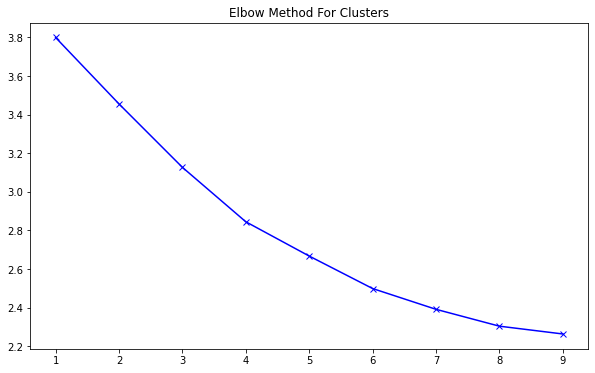

In [19]:
# Find number of clusters using the elbow method
laClustering = laGrouped.drop('Zip', 1)
ssd = []
K = range(1,10)

for k in K:
    kmeans = KMeans(
                n_clusters=k, 
                random_state=100,
                n_init=10,
                max_iter=300)
    
    kmeans.fit(laClustering)
    ssd.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, ssd, 'bx-')
plt.title('Elbow Method For Clusters')

In [20]:
# Number of clusters
ks = 4

# Run Kmeans
kmeans = KMeans(n_clusters=ks).fit(laClustering)

In [21]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 1, 2, 2, 0,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 3, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 1, 2, 1, 1, 2, 2, 2, 2], dtype=int32)

In [22]:
# view cluster centers
kmeans.cluster_centers_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.30104261e-18, -2.16840434e-19,  6.17283951e-04, ...,
         3.88548605e-03,  1.73779000e-03,  4.20875421e-04],
       [ 2.56997054e-03,  9.09609014e-04,  1.66572591e-03, ...,
         2.90713892e-03,  2.17846661e-03, -4.06575815e-20],
       [ 0.00000000e+00,  2.24719101e-03,  7.00909577e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [23]:
# add cluster labels
laVenuesSrt.insert(1, 'Cluster Labels', kmeans.labels_)

laVenuesSrt.head()

,Zip,Cluster Labels,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
0,90001,2,Automotive Shop,Salon / Barbershop,Doctor's Office,Mobile Phone Shop,Hardware Store,Church,Miscellaneous Shop,Bank,Wine Bar,Donut Shop
1,90002,2,Bank,Building,Miscellaneous Shop,Church,Mobile Phone Shop,High School,Taco Place,School,Salon / Barbershop,Light Rail Station
2,90003,2,Church,Automotive Shop,Salon / Barbershop,Miscellaneous Shop,Gas Station,Building,Mobile Phone Shop,Taco Place,Mexican Restaurant,Office
3,90004,2,Korean Restaurant,Automotive Shop,Latin American Restaurant,Dentist's Office,Mexican Restaurant,Laundromat,Bakery,Sushi Restaurant,Bus Station,Dive Bar
4,90005,0,Residential Building (Apartment / Condo),Spiritual Center,Wine Bar,Eye Doctor,Gym,Zoo Exhibit,Elementary School,Electronics Store,Eastern European Restaurant,EV Charging Station


In [24]:
laVenuesSrt.loc[laVenuesSrt['Cluster Labels'] == 0, laVenuesSrt.columns[[0] + [1] + list(range(2, laVenuesSrt.shape[1]))]]

,Zip,Cluster Labels,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
4,90005,0,Residential Building (Apartment / Condo),Spiritual Center,Wine Bar,Eye Doctor,Gym,Zoo Exhibit,Elementary School,Electronics Store,Eastern European Restaurant,EV Charging Station
21,90024,0,Residential Building (Apartment / Condo),Hotel,Gym,Gym / Fitness Center,Rental Car Location,Art Gallery,Food,Breakfast Spot,TV Station,General Travel


In [25]:
laVenuesSrt.loc[laVenuesSrt['Cluster Labels'] == 1, laVenuesSrt.columns[[0] + [1] + list(range(2, laVenuesSrt.shape[1]))]]

,Zip,Cluster Labels,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
13,90015,1,Office,Art Gallery,Parking,Gym,Food Truck,General Entertainment,Bus Line,Residential Building (Apartment / Condo),Roof Deck,Miscellaneous Shop
18,90020,1,Korean Restaurant,Residential Building (Apartment / Condo),Doctor's Office,Building,Dentist's Office,Church,Lawyer,Nail Salon,Ice Cream Shop,Miscellaneous Shop
25,90028,1,Office,Building,General Entertainment,Comedy Club,Coworking Space,Bar,Lounge,Nightclub,Historic Site,Parking
32,90036,1,Residential Building (Apartment / Condo),Office,Building,Bridal Shop,Speakeasy,Coffee Shop,Miscellaneous Shop,Design Studio,Furniture / Home Store,Coworking Space
41,90046,1,Office,General Entertainment,Building,Bank,Speakeasy,Nail Salon,Dance Studio,Pet Service,General College & University,Print Shop
45,90056,1,Office,Salon / Barbershop,Government Building,Building,Cosmetics Shop,General Entertainment,School,Sandwich Place,Speakeasy,Fast Food Restaurant
46,90057,1,Residential Building (Apartment / Condo),Office,Dentist's Office,Government Building,Theater,Building,South American Restaurant,General Entertainment,Performing Arts Venue,Automotive Shop
47,90058,1,Building,Factory,Office,Warehouse,Medical Center,Coworking Space,Seafood Restaurant,Paper / Office Supplies Store,Coffee Shop,Gas Station
52,90064,1,Office,Furniture / Home Store,Tech Startup,Miscellaneous Shop,Building,Government Building,Salon / Barbershop,Jewelry Store,Hardware Store,Paper / Office Supplies Store
53,90065,1,Office,Building,Residential Building (Apartment / Condo),Trail,Art Gallery,Scenic Lookout,Parking,Nightclub,Coffee Shop,Food


In [26]:
laVenuesSrt.loc[laVenuesSrt['Cluster Labels'] == 2, laVenuesSrt.columns[[0] + [1] + list(range(2, laVenuesSrt.shape[1]))]]

,Zip,Cluster Labels,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
0,90001,2,Automotive Shop,Salon / Barbershop,Doctor's Office,Mobile Phone Shop,Hardware Store,Church,Miscellaneous Shop,Bank,Wine Bar,Donut Shop
1,90002,2,Bank,Building,Miscellaneous Shop,Church,Mobile Phone Shop,High School,Taco Place,School,Salon / Barbershop,Light Rail Station
2,90003,2,Church,Automotive Shop,Salon / Barbershop,Miscellaneous Shop,Gas Station,Building,Mobile Phone Shop,Taco Place,Mexican Restaurant,Office
3,90004,2,Korean Restaurant,Automotive Shop,Latin American Restaurant,Dentist's Office,Mexican Restaurant,Laundromat,Bakery,Sushi Restaurant,Bus Station,Dive Bar
5,90006,2,Korean Restaurant,Bank,Gas Station,Cosmetics Shop,Spa,Doctor's Office,Café,Bakery,Bus Stop,Building
...,...,...,...,...,...,...,...,...,...,...,...,...
116,91505,2,Antique Shop,Office,Gift Shop,Cosmetics Shop,Salon / Barbershop,Clothing Store,Nail Salon,Thrift / Vintage Store,Food Truck,Boutique
119,91604,2,Bank,Cosmetics Shop,Office,Salon / Barbershop,Arts & Crafts Store,Coffee Shop,Gift Shop,Cycle Studio,Furniture / Home Store,Optical Shop
120,91605,2,Automotive Shop,Furniture / Home Store,Building,Gas Station,Laundry Service,Dentist's Office,Hardware Store,Salon / Barbershop,Food Truck,Storage Facility
121,91606,2,Residential Building (Apartment / Condo),Automotive Shop,Mexican Restaurant,Medical Center,Taco Place,Bakery,Building,Dentist's Office,Nightclub,Fast Food Restaurant


In [27]:
laVenuesSrt.loc[laVenuesSrt['Cluster Labels'] == 3, laVenuesSrt.columns[[0] + [1] + list(range(2, laVenuesSrt.shape[1]))]]

,Zip,Cluster Labels,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
15,90017,3,Doctor's Office,Dentist's Office,Office,Building,Medical Center,Residential Building (Apartment / Condo),Tech Startup,Lawyer,Deli / Bodega,Café
62,90211,3,Doctor's Office,Medical Center,Office,Building,Dentist's Office,Cosmetics Shop,Indian Restaurant,Chiropractor,Tanning Salon,Tech Startup
81,90732,3,Doctor's Office,Dentist's Office,Medical Center,Hospital,Building,Salon / Barbershop,Coworking Space,Medical Lab,Park,Garden
90,91307,3,Doctor's Office,Medical Center,Dentist's Office,Medical Lab,Flower Shop,Professional & Other Places,Office,Gym,Salon / Barbershop,Heliport
114,91436,3,Doctor's Office,Office,Dentist's Office,Medical Center,Financial or Legal Service,Building,Lawyer,Chiropractor,Salon / Barbershop,Hospital


In [31]:
laDFMerged = laDF

# merge madrid_grouped with df_madrid to add latitude/longitude for each neighbourhood
laDFMerged = laVenuesSrt.join(laDFMerged.set_index('Zip'), on='Zip')

laDFMerged.head()

,Zip,Cluster Labels,1st,2nd,3rd,4th,5th,6th,7th,8th,...,Pct_Female,Females_Median_Age,Total_Households,Households_with_Children,Pct_Households_with_Children,Pct_Owner_Occupied,Pct_Renter_Occupied,Household_Median_Income,Household_Median_Inc_Quintiles,Pct_Earned_Income_Past_12_Months
0,90001,2,Automotive Shop,Salon / Barbershop,Doctor's Office,Mobile Phone Shop,Hardware Store,Church,Miscellaneous Shop,Bank,...,48.3,29.6,13669,6033,44.1,35.9,64.1,43360,Quintile 1,45.7
1,90002,2,Bank,Building,Miscellaneous Shop,Church,Mobile Phone Shop,High School,Taco Place,School,...,52.3,28.6,12917,5650,43.7,35.0,65.0,37285,Quintile 1,45.9
2,90003,2,Church,Automotive Shop,Salon / Barbershop,Miscellaneous Shop,Gas Station,Building,Mobile Phone Shop,Taco Place,...,51.0,29.3,17484,7839,44.8,28.3,71.7,40598,Quintile 1,49.1
3,90004,2,Korean Restaurant,Automotive Shop,Latin American Restaurant,Dentist's Office,Mexican Restaurant,Laundromat,Bakery,Sushi Restaurant,...,50.7,35.5,22004,5392,24.5,16.6,83.4,49675,Quintile 2,36.1
4,90005,0,Residential Building (Apartment / Condo),Spiritual Center,Wine Bar,Eye Doctor,Gym,Zoo Exhibit,Elementary School,Electronics Store,...,49.6,36.7,16781,3235,19.3,7.7,92.3,38491,Quintile 1,30.4


In [ ]:
laCombinedCSV = '../../data/la_combined.csv'

laDF